In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection


# 1 Analyse des données

#####  1.1 Charger la base de données (dataset.dat). Diviser la base de données aléatoirement (fonction train_test_split) en deux corpus (les classes sont équi-représentées dans les deux corpus) : base d’apprentissage (X_train, y_train) : 70% des données base de test (X_test, y_test): le reste (30% des données) Afficher les données d’apprentissage et de test (fonction pyplot.show). Préciser la dimension des exemples, le nombre de classe, le nombre d’exemples d’apprentissage et de test.



Import du dataset

In [5]:
dataset = np.loadtxt("dataset.dat")
X = dataset[:,0:2] 
y = dataset[:,2]
y = y.astype(int)


Show du data set

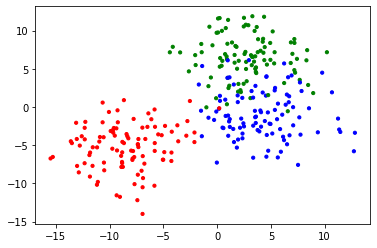

In [6]:
colors = np.array([x for x in "rgbcmyk"]) 
plt.scatter(X[:, 0], X[:, 1], color=colors[y].tolist(), s=10) 
plt.show()

Split du dataset en train et test 70%train et 30% test

In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7, test_size=0.3)

In [8]:
print("Dimension des données d'entrainement : {} données pour {} features ".format(X_train.shape[0], X_train.shape[1]))
print("Dimension des label d'entrainement : {} données ".format(y_train.shape[0]))
print("Dimension des données de test : {} données pour {} features ".format(X_test.shape[0], X_test.shape[1]))
print("Dimension des label d'entrainement : {} données ".format(y_test.shape[0]))

Dimension des données d'entrainement : 210 données pour 2 features 
Dimension des label d'entrainement : 210 données 
Dimension des données de test : 90 données pour 2 features 
Dimension des label d'entrainement : 90 données 


Nous affichons les données test et train en fonction de leur label

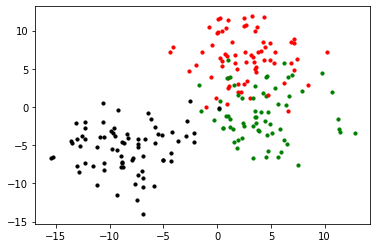

In [9]:

i=0
for i in range(210):
    if(y_train[i]==0):
        plt.scatter(X_train[i, 0], X_train[i, 1], s=10,color="black") 
    if(y_train[i]==1):
        plt.scatter(X_train[i, 0], X_train[i, 1], s=10,color="red")
    if(y_train[i]==2):
        plt.scatter(X_train[i, 0], X_train[i, 1], s=10,color="green")
        
plt.show()

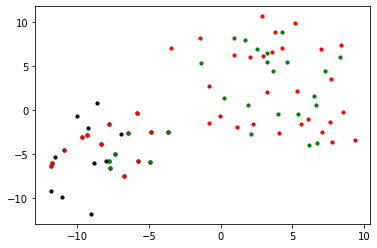

In [10]:

i=0
for i in range(90):
    if(y_test[i]==0):
        plt.scatter(X_test[i, 0], X_test[i, 1], s=10,color="black") 
    if(y_train[i]==1):
        plt.scatter(X_test[i, 0], X_test[i, 1], s=10,color="red")
    if(y_train[i]==2):
        plt.scatter(X_test[i, 0], X_test[i, 1], s=10,color="green")
        
plt.show()

In [11]:
print (dataset.shape)
print (X_train.shape[0])
print (X_test.shape[0])


(300, 3)
210
90


- Le nombre d'exemples du dataset est 300 pour 3 classes
- Le nombre d'exemples d'apprentissage est 210
- Le nombre d'exemples de test est 90

# 2 Algorithme du plus-proche-voisin

##### 2.1 Définir un classifieur du (1-)plus-proche-voisin : one_NN = KNeighborsClassifier(n_neighbors=1, algorithm='brute')


Import du KNN

In [12]:
one_NN = KNeighborsClassifier(n_neighbors=1, algorithm='brute')


##### 2.2 Le régler sur la base d’apprentissage (fonction fit).

In [13]:
one_NN.fit(X_train, y_train)


KNeighborsClassifier(algorithm='brute', n_neighbors=1)

##### 2.3 Evaluer le taux de reconnaissance le taux de reconnaissance sur les bases d’apprentissage et de test (fonction score). Déterminer la matrice de confusion.

Accuraccy sur le training

In [14]:
print('accuraccy on training set:', one_NN.score(X_train, y_train))

accuraccy on training set: 1.0


Accuraccy sur le test

In [15]:
print('accuraccy on training set:', one_NN.score(X_test, y_test))

accuraccy on training set: 0.8555555555555555


Matrice de confusion

In [16]:
y_pred_test = one_NN.predict(X_test) 
metrics.confusion_matrix(y_test, y_pred_test)

array([[27,  0,  0],
       [ 0, 25,  4],
       [ 1,  8, 25]])

##### 2.4 Afficher les frontières de décision définies par les données d’apprentissage. Vérifier qu’elles correspondent à l’attendu.

Voici les frontieres de decisions train

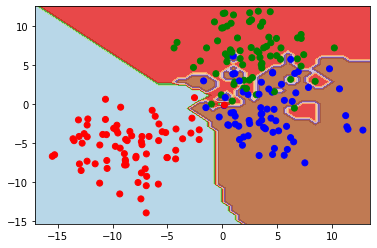

In [17]:
x_min, x_max = X[:, 0].min()*1.1, X[:, 0].max()*1.1 
y_min, y_max = X[:, 1].min()*1.1, X[:, 1].max()*1.1 
x_h = (x_max - x_min)/50
y_h = (y_max - y_min)/50
xx, yy = np.meshgrid(np.arange(x_min, x_max, x_h), np.arange(y_min, y_max, y_h))
Y = one_NN.predict(np.c_[xx.ravel(), yy.ravel()]) 
Y = Y.reshape(xx.shape)
plt.contourf(xx, yy, Y, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], cmap=plt.cm.Paired, color=colors[y_train].tolist()) 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

##### 2.5 Afficher les frontières de décisions et les données de test. Retrouver les erreurs de classification.

Voici les frontieres de decisions train et les données test

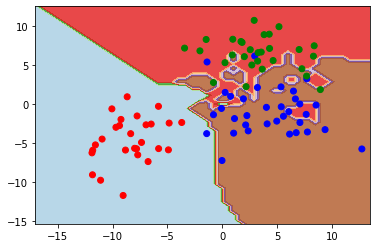

In [18]:
plt.contourf(xx, yy, Y, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], cmap=plt.cm.Paired, color=colors[y_test].tolist()) 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

In [19]:
X_train.shape

(210, 2)

# 3 Analyse du fonctionnement de l’algorithme

##### 3.1 On utilise toute la base de test. Générer une base d’apprentissage X_train1 dont la taille varie de 1% à 100% de X_train. Evaluer l’algorithme du ppv sur X_test, en utilisant X_train1. Stocker le taux de reconnaissance. Tracer le graphe (taux de reconnaissance en fonction du nombre d’exemples d’apprentissage). Expliquer l’influence du nombre d’exemples d’apprentissage sur le taux de reconnaissance et le temps de classification.



je separe le data set x_train 99 fois; Et sur chaque iteration j'entraine mon ppx avec les donnéex x train1 et y train1. Je test mon modele sur X test. Je recupere l'accurancy et le nombre d'exemple dans un tableau

In [26]:
accurancy1=[]
nbrexemple1=[]
for compteur in np.arange(0.01,1.0,0.01):
    X_train1,X_test1,y_train1,y_test1=model_selection.train_test_split(X_train,y_train, train_size=compteur, test_size=1-compteur)
    one_NN = KNeighborsClassifier(n_neighbors=1, algorithm='brute')
    one_NN.fit(X_train1, y_train1)
    X_train1=np.array(X_train1)
    accurancy1.append(one_NN.score(X_test, y_test))
    nbrexemple1.append(X_train1.shape[0])
    

je transforme mon accurancy1 en un np pour avoir le max

In [27]:
accurancy1=np.array(accurancy1)

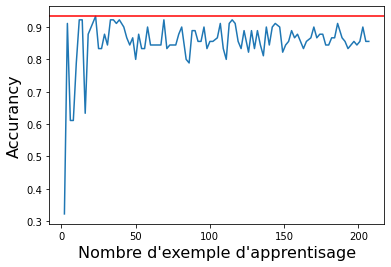

In [28]:
plt.axes()
plt.plot(nbrexemple1, accurancy1)
plt.xlabel("Nombre d'exemple d'apprentisage", size = 16)
plt.ylabel("Accurancy", size = 16)
plt.axhline(y=np.max(accurancy1),color="red")
plt.show() 


##### 3.2 On utilise toute la base d’apprentissage. Générer une base de test X_test1 dont la taille varie de 1% à 100% de X_test. Evaluer l’algorithme du ppv sur X_test1, en utilisant X_train. Stocker le taux de reconnaissance. Tracer le graphe (taux de reconnaissance en fonction du nombre d’exemples de test). Expliquer l’influence du nombre d’exemples de test sur le taux de reconnaissance.

In [23]:

accurancy2=[] 
nbrexemple2=[]
for compteur in np.arange(0.03,1.0,0.01):
    X_train1,X_test1,y_train1,y_test1=model_selection.train_test_split(X_test,y_test, train_size=compteur, test_size=1-compteur)
    one_NN = KNeighborsClassifier(n_neighbors=1, algorithm='brute')
    one_NN.fit(X_train, y_train)
    accurancy2.append(one_NN.score(X_test1, y_test1))
    X_test1=np.array(X_test1)
    nbrexemple2.append(X_test1.shape[0])

je transforme mon accurancy2 en un np pour avoir le max


In [24]:

accurancy2=np.array(accurancy2)

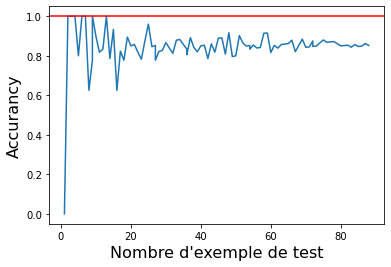

In [30]:
plt.axes()
plt.plot(nbrexemple2, accurancy2)
plt.xlabel("Nombre d'exemple de test", size = 16)
plt.ylabel("Accurancy", size = 16)
plt.axhline(y=np.max(accurancy2),color="red")
plt.show() 

# 4 Algorithme des k-ppv

##### 4.1 Tester la fonction KNeighborsClassifier en faisant varier le paramètre k de 1 à une valeur maximum kmax choisie judicieusement et justifiée.

J'ai trois classe, je vais donc faire varier mon knn de 1/3(donne train) le faire varier plus lui donnerais trop de voisin pour un seul cluster et ne serai donc pas utile

In [37]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7, test_size=0.3)
X_train=np.array(X_train)
X_train.shape[0]/3


70.0

In [32]:
accurancy4=[]
nbrexemple4=[]
for i in range(1,70):
    one_NN = KNeighborsClassifier(n_neighbors=i, algorithm='brute')
    one_NN.fit(X_train, y_train)
    accurancy4.append(one_NN.score(X_test, y_test))
    nbrexemple4.append(i)

In [33]:
accurancy4=np.array(accurancy4)
indexmax =np.where( accurancy4==np.max(accurancy4) )

##### 4.2	Observer l’influence du paramètre k sur le taux d’erreur en test : tracer le graphe (taux de reconnaissance en fonction de k). Donner la valeur optimale k* (qui minimise l’erreur en test) de k.

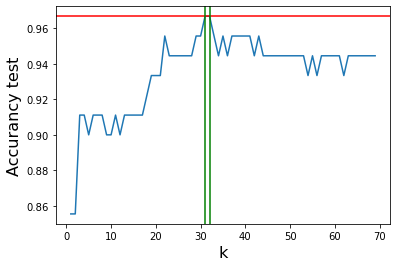

In [34]:
plt.axes()
plt.plot(nbrexemple4, accurancy4)
plt.xlabel("k", size = 16)
plt.ylabel("Accurancy test", size = 16)
plt.axhline(y=np.max(accurancy4),color="red")
for i in range(len(indexmax[0])):
    plt.axvline(x=indexmax[0][i]+1,color="green")
    
plt.show() 

In [248]:
print("La valeur de K optimal est:",indexmax[0][0])
opitmal=indexmax[0][0]

La valeur de K optimal est: 14


##### 4.3	Afficher les frontières de décision pour :k = 1 k = k* k = kmax Conclure sur l’impact de k sur la forme des frontières et justifier qualitativement la valeur k*. Dans ces trois situations, que peut-on dire du biais et de la variance ?


pour k=1

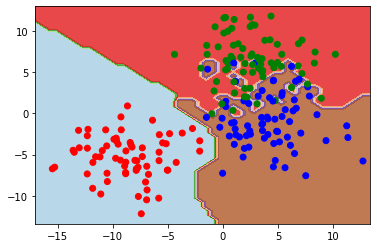

In [35]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7, test_size=0.3)
one_NN = KNeighborsClassifier(n_neighbors=1, algorithm='brute')
one_NN.fit(X_train, y_train)

x_min, x_max = X_train[:, 0].min()*1.1, X_train[:, 0].max()*1.1 
y_min, y_max = X_train[:, 1].min()*1.1, X_train[:, 1].max()*1.1 
x_h = (x_max - x_min)/50
y_h = (y_max - y_min)/50
xx, yy = np.meshgrid(np.arange(x_min, x_max, x_h), np.arange(y_min, y_max, y_h))
Y = one_NN.predict(np.c_[xx.ravel(), yy.ravel()]) 
Y = Y.reshape(xx.shape)
plt.contourf(xx, yy, Y, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_train[:,0], X_train[:,1], cmap=plt.cm.Paired, color=colors[y_train].tolist()) 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

pour k optimal (k=optimal)

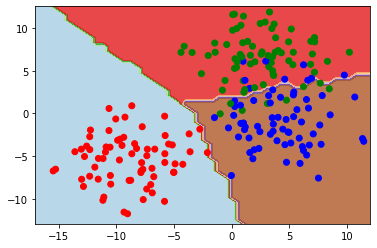

In [235]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7, test_size=0.3)
one_NN = KNeighborsClassifier(n_neighbors=opitmal, algorithm='brute')
one_NN.fit(X_train, y_train)

x_min, x_max = X_train[:, 0].min()*1.1, X_train[:, 0].max()*1.1 
y_min, y_max = X_train[:, 1].min()*1.1, X_train[:, 1].max()*1.1 
x_h = (x_max - x_min)/50
y_h = (y_max - y_min)/50
xx, yy = np.meshgrid(np.arange(x_min, x_max, x_h), np.arange(y_min, y_max, y_h))
Y = one_NN.predict(np.c_[xx.ravel(), yy.ravel()]) 
Y = Y.reshape(xx.shape)
plt.contourf(xx, yy, Y, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], cmap=plt.cm.Paired, color=colors[y_train].tolist()) 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

pour k=max (k=70)

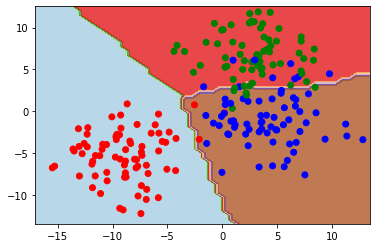

In [236]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7, test_size=0.3)
one_NN = KNeighborsClassifier(n_neighbors=70, algorithm='brute')
one_NN.fit(X_train, y_train)

x_min, x_max = X_train[:, 0].min()*1.1, X_train[:, 0].max()*1.1 
y_min, y_max = X_train[:, 1].min()*1.1, X_train[:, 1].max()*1.1 
x_h = (x_max - x_min)/50
y_h = (y_max - y_min)/50
xx, yy = np.meshgrid(np.arange(x_min, x_max, x_h), np.arange(y_min, y_max, y_h))
Y = one_NN.predict(np.c_[xx.ravel(), yy.ravel()]) 
Y = Y.reshape(xx.shape)
plt.contourf(xx, yy, Y, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], cmap=plt.cm.Paired, color=colors[y_train].tolist()) 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

##### 4.4 Observer l’influence du paramètre k sur le taux d’erreur en apprentissage : tracer le graphe (taux de reconnaissance en fonction de k). 

In [67]:
accurancy5=[]
nbrexemple5=[]
for i in range(1,70):
    one_NN = KNeighborsClassifier(n_neighbors=i, algorithm='kd_tree',weights='distance',p=2)
    one_NN.fit(X_train, y_train)
    accurancy5.append(one_NN.score(X_train, y_train))
    nbrexemple5.append(i)

In [68]:
accurancy5=np.array(accurancy5)
indexmax2 =np.where(accurancy5==np.max(accurancy5))

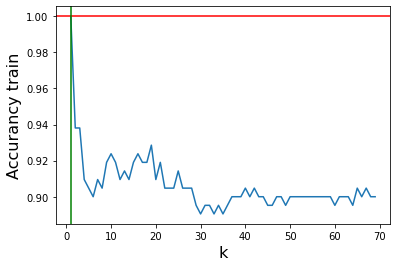

In [69]:
plt.axes()
plt.plot(nbrexemple5, accurancy5)
plt.xlabel("k", size = 16)
plt.ylabel("Accurancy train", size = 16)
plt.axhline(y=np.max(accurancy5),color="red")
for i in range(len(indexmax2[0])):
    plt.axvline(x=indexmax2[0][i]+1,color="green")
    
plt.show() 

##### 4.5 Le protocole mis en œuvre pour régler le paramètre k est-il satisfaisant ? Justifier votre réponse.

In [36]:
help(KNeighborsClassifier)


Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.NeighborsBase, sklearn.neighbors._base.KNeighborsMixin, sklearn.neighbors._base.SupervisedIntegerMixin, sklearn.base.ClassifierMixin)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of t